In [41]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

In [42]:
load_dotenv()

True

In [43]:
model = ChatOpenAI(model='gpt-5-nano')

In [44]:
class  CricketState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percentage: float
    summary: str

In [45]:
def calculate_sr(state: CricketState) -> CricketState:
    state['sr'] = (state['runs'] / state['balls']) * 100
    return {'sr' : state['sr']}

In [46]:
def calculate_bpb(state: CricketState) -> CricketState:
    state['bpb'] = state['balls']/(state['fours'] + state['sixes'])
    return {'bpb' : state['bpb']}

In [47]:
def calculate_boundary_percentage(state: CricketState) -> CricketState:
    state['boundary_percentage'] = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100
    return {'boundary_percentage' : state['boundary_percentage']}

In [48]:
def summary(state: CricketState) -> CricketState:

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percentage']}
"""
    
    return {'summary': summary}

In [49]:
graph = StateGraph(CricketState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summary', summary)


graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percentage')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')

graph.add_edge('summary', END)


workflow = graph.compile()

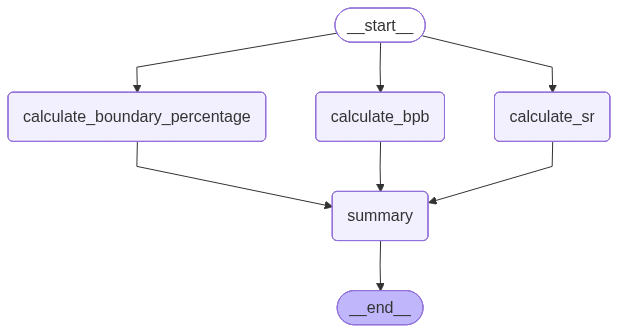

In [50]:
workflow

In [51]:
intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

workflow.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percentage': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}